<a href="https://colab.research.google.com/github/kiakass/blog/blob/main/som_clustering_share.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 패키지설치

In [ ]:
!pip install sklearn_som

In [ ]:
# 한글 폰트
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
from sklearn_som.som import SOM

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

### Data load, preprocessing

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
# 데이터는 made by self
dir='/gdrive/My Drive/data/'
user_features = pd.read_csv(dir+'seg_use.csv', delimiter=',')
df = pd.read_csv(dir+'seg_use.csv', delimiter=',')

In [ ]:
# 문자 to 숫자로 변환 : hash 함수 사용
import zlib
df['userid']=list(map(lambda x:zlib.crc32(x.encode('UTF-8')), np.array(df.userid.fillna(''))))
df['sex_cd']=list(map(lambda x:zlib.crc32(x.encode('UTF-8')), np.array(df.sex_cd.fillna(''))))

In [ ]:
df # 400만 rows X 82 Columns

,userid,sex_cd,age_band,live_tot_tm,live_pub_tm,live_prb_tm,live_enter_tm,live_movie_tm,live_news_tm,live_docu_tm,live_kids_tm,live_shop_tm,live_reli_tm,live_adult_tm,live_sport_tm,live_genre1,live_genre2,live_genre3,live_genre4,live_genre5,live_genre6,avg_wtch_cnt,avg_fwtch_cnt,avg_buy_cnt,avg_buy_amt,price_band,v_m_cmd_cnt,v_m_act_cnt,v_m_thr_cnt,v_m_adt_cnt,v_m_lom_cnt,v_m_dra_cnt,v_m_ani_cnt,v_m_hor_cnt,v_m_fan_cnt,v_t_ent_cnt,v_t_cis_cnt,v_t_dra_cnt,v_k_bok_cnt,v_k_lan_cnt,...,v_k_ply_cnt,v_k_dan_cnt,v_k_cat_cnt,v_a_cmd_cnt,v_a_act_cnt,v_a_ser_cnt,v_a_hor_cnt,v_a_fan_cnt,v_a_mcn_cnt,v_s_cha_cnt,v_s_usa_cnt,v_l_art_cnt,vod_w_tv_cnt,vod_w_movie_cnt,vod_w_kids_cnt,vod_w_ani_cnt,vod_w_dram_cn,vod_genre1,vod_genre2,vod_genre3,vod_genre4,apps_nflx_cnt,apps_ytube_cnt,apps_baseball_cnt,apps_wave_cnt,apps_homt_cnt,apps_ykids_cnt,apps_vlive_cnt,apps_afreeca_cnt,apps_song_cnt,apps_arzoo_cnt,apps_twch_cnt,apps_tot_cnt,apps_genre1,apps_genre2,apps_genre3,apps_genre4,apps_genre5,apps_genre6,y
0,3556385930,1662520605,11.0,547241,167872,120834,149610,67510,8406,12,0,7147,0,0,25850,45283692,2076728705,3248766253,2450317864,4278703443,1489577632,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,205.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,2561310017,3476907822,0,0,0,0,5
1,3031503324,3129757162,9.0,449172,103150,65092,209806,1973,6396,1128,43462,18043,0,0,122,2076728705,45283692,3248766253,3305877506,3114705274,1489577632,2.0,1.0,1.0,1300.0,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,4.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,3476907822,2561310017,0,0,0,0,11
2,873503928,1662520605,9.0,464018,6820,77315,240576,3225,41219,16,91219,3518,0,0,110,2076728705,3305877506,3248766253,1489577632,45283692,3114705274,1.0,1.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,4.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2561310017,2521058086,3912256130,2181780262,3268133970,2836827341,10
3,1822686731,1662520605,8.0,408927,142688,15156,102711,39938,98,0,1036,1396,0,0,105904,45283692,4278703443,2076728705,2450317864,3248766253,3114705274,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,22.0,133.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,157.0,3476907822,2561310017,840754528,3246903811,0,0,0
4,1932611365,1662520605,10.0,666141,172114,187314,256392,18405,8222,3951,0,15341,0,0,4402,2076728705,3248766253,45283692,2450317864,3114705274,1489577632,1.0,1.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1.0,1.0,3.0,6.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,35.0,1270062503,3990865489,2836827341,3912256130,3993664330,1749770679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4134272,580578968,1662520605,13.0,806605,64227,400128,88217,4820,212330,8827,0,28056,0,0,0,3248766253,1489577632,2076728705,45283692,3114705274,3950491185,2.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,4
4134273,1116433210,1662520605,9.0,410897,146205,22826,197646,32471,212,6448,0,281,0,0,4808,2076728705,45283692,2450317864,3248766253,3950491185,4278703443,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

### $ {\color{Red} {SOM : Self-Oragnizing \, Map \, Cluster}}$

>  m : int, default=3, The shape along dimension 0 (vertical) of the SOM. <br>
>  n : int, default=3,  The shape along dimesnion 1 (horizontal) of the SOM. <br>
>  dim : int, default=3, The dimensionality (number of features) of the input space. <br>

In [ ]:
import time
start = time.time()
iptv_data = np.array(df.iloc[:,1:81].fillna(0)) # array 로 변경해야함
iptv_som = SOM(m=3, n=5, dim=80)
iptv_som.fit(iptv_data)
end = time.time(); print('time :',end-start) 

time : 211.87316012382507


In [ ]:
start = time.time()
predictions = iptv_som.predict(iptv_data)
df['y']=predictions
user_features['y']=predictions
end = time.time(); print('time :',end-start) 

time : 154.1711506843567


In [ ]:
user_features.y.value_counts().sort_index()

0     289072
1     115333
2     284752
3     272417
4     475324
5     325463
6     158982
7     114307
8     198551
9     509113
10    309332
11    343628
12    331621
13     83058
14    323324
Name: y, dtype: int64

### EDA : 시각화 분석

> 분석의 형태에 따라 적절한 그래프를 사용

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
plt.rcParams["font.size"]=12
plt.rcParams["font.family"]='Malgun Gothic'
#plt.rc('font', family='NanumBarunGothic') 

In [ ]:
# Categorize
def df_categorize(df,fn,bins,group_names):
  df[fn] = df[fn].fillna(0)
  categories = pd.cut(df[fn], bins, labels=group_names)
  df[fn]=categories
  return df

df_category = df_categorize(df,'price_band',bins = (-1,1,1000,3000,5000,7000,9900,19000, 30000),group_names = [0,1000,3000,5000,7000,9900,20000,30000])

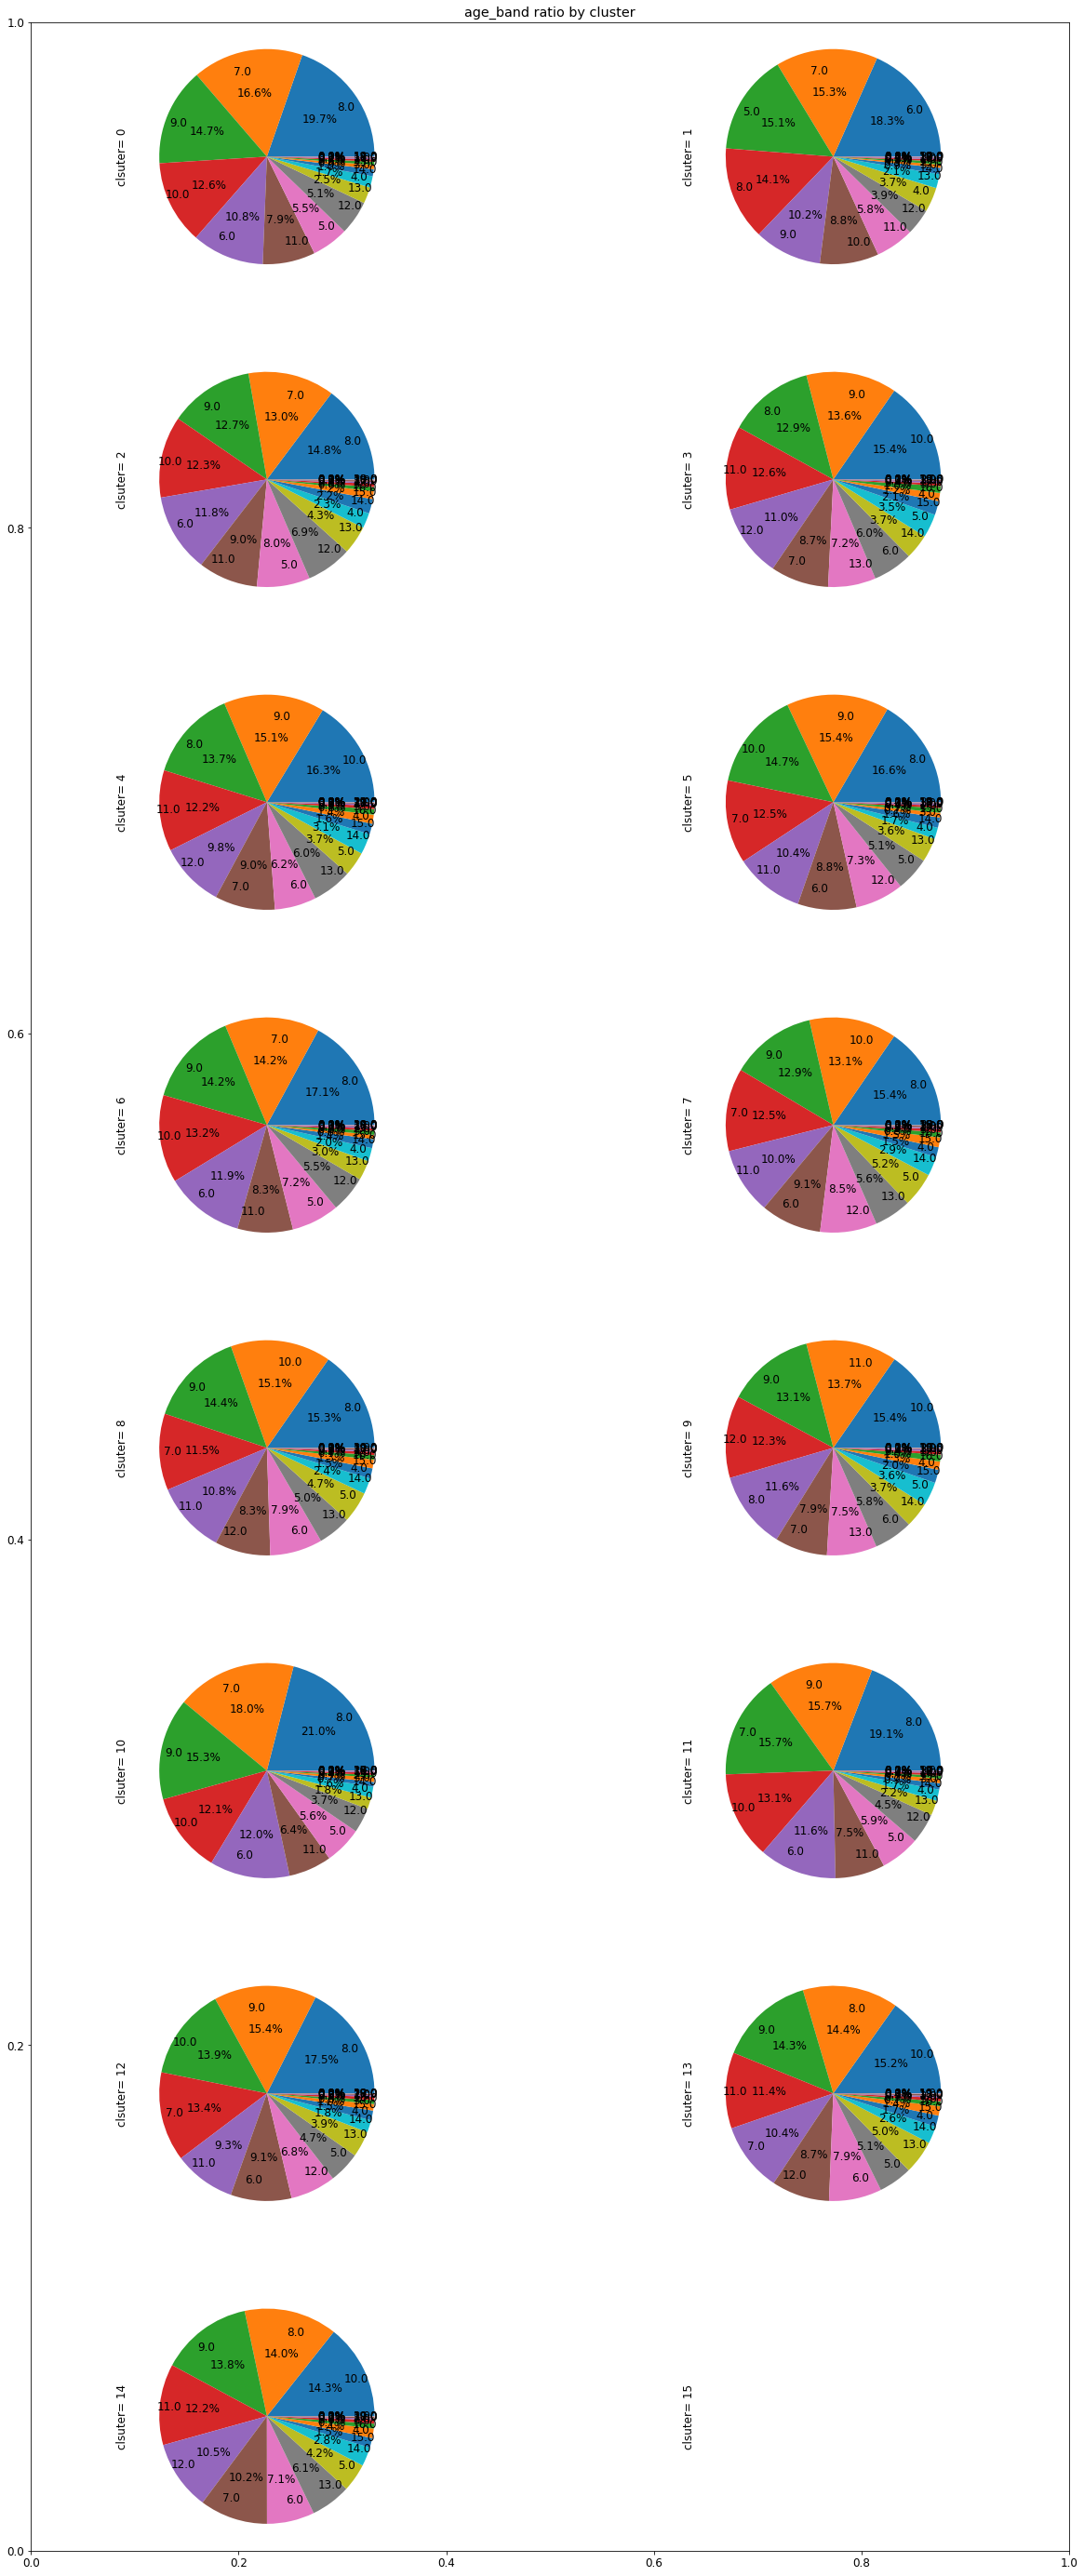

In [ ]:
# 파이 그래프 : df
a="age_band" # live_genre1, vod_genre1, apps_genre1, age_band, sex_cd, price_band
b="y"

M=2
N=8

fig = plt.figure(figsize=(20, 50))
plt.title(str(a)+' ratio by cluster')
                          
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        df[a][ (df[b]== k) & (df[a]!=0)].value_counts().plot.pie(autopct='%.1f%%',ax=ax,label='clsuter= '+str(k),textprops={'fontsize': 12},labeldistance=0.8)
